In [3]:
!pip install adtk

   ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
   ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
   ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
   ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
   -------------------- ------------------- 30.7/61.0 kB 131.3 kB/s eta 0:00:01
   -------------------------- ------------- 41.0/61.0 kB 164.3 kB/s eta 0:00:01
   --------------------------------- ------ 51.2/61.0 kB 175.0 kB/s eta 0:00:01
   ---------------------------------------- 61.0/61.0 kB 190.7 kB/s eta 0:00:00


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from adtk.data import validate_series
from adtk.visualization import plot 
from adtk.detector import *

In [19]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [7]:
data = pd.read_csv("31_Jaffna_hourly.csv")
data.rename(columns={'Unnamed: 0':'id','timestamp_index':'time','PM2.5 (ug/m3)':'PM25'},inplace=True)

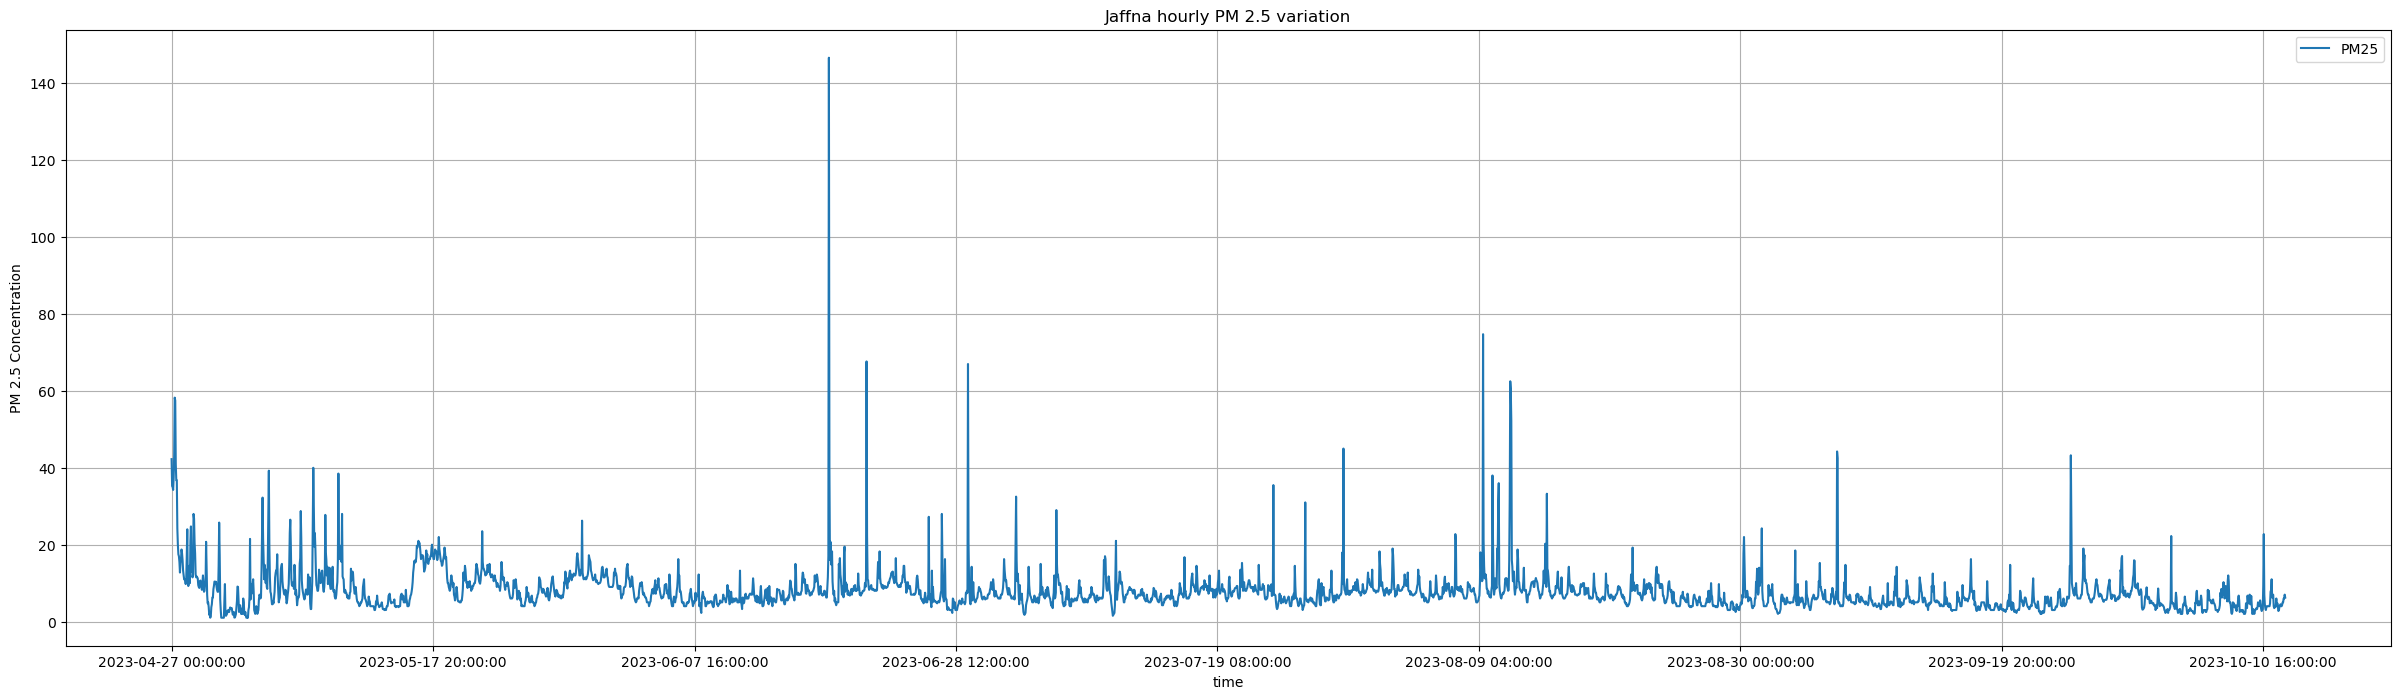

In [9]:
data.plot(x='time',y='PM25',figsize=(30,8),grid=True)
data["time"]=pd.to_datetime(data["time"])
#df['date'] = pd.to_datetime(df['date'])
data.set_index("time", inplace=True)

plt.xlabel('time')
plt.ylabel('PM 2.5 Concentration')
plt.title("Jaffna hourly PM 2.5 variation")
plt.show()

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

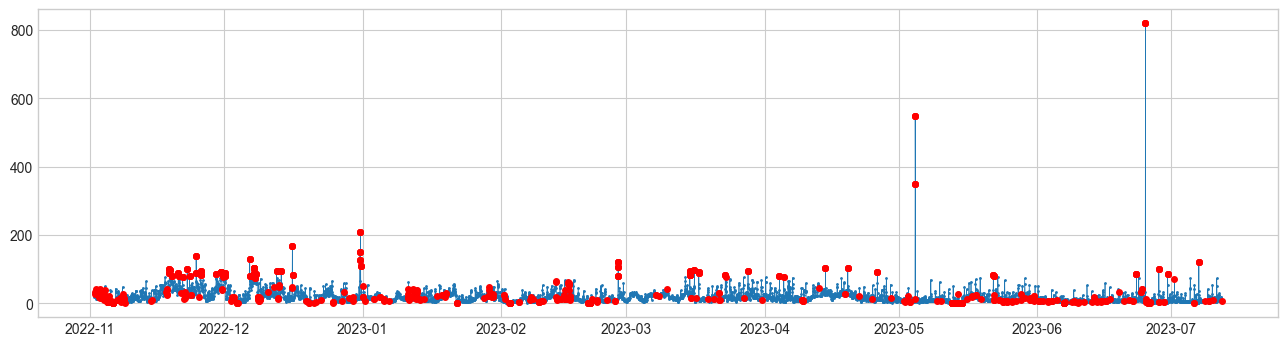

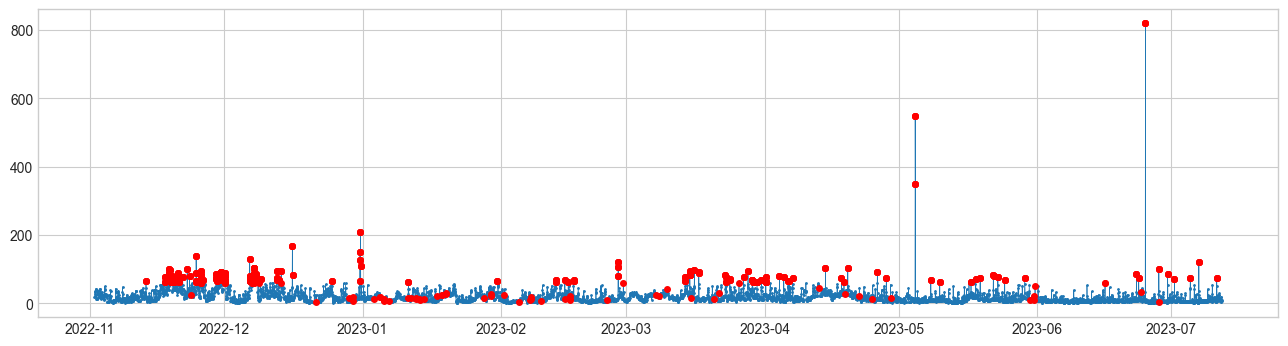

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("31_Jaffna_hourly.csv")
data.rename(columns={'Unnamed: 0': 'id', 'timestamp_index': 'time', 'PM2.5 (ug/m3)': 'PM25'}, inplace=True)

# Convert time column to datetime format and set as index
data["time"] = pd.to_datetime(data["time"])
data.set_index("time", inplace=True)

# 1. Z-Score Method
from scipy.stats import zscore

# Calculate the Z-scores for PM2.5 column
data['zscore'] = zscore(data['PM25'])

# Identify outliers (Z-score > 3 or < -3)
outliers_zscore = data[abs(data['zscore']) > 3]

# 2. IQR (Interquartile Range) Method
Q1 = data['PM25'].quantile(0.25)
Q3 = data['PM25'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers (values outside the 1.5*IQR range)
outliers_iqr = data[(data['PM25'] < (Q1 - 1.5 * IQR)) | (data['PM25'] > (Q3 + 1.5 * IQR))]

# 3. Threshold-based Method using ADTK (Optional)
from adtk.data import validate_series
from adtk.detector import ThresholdAD
from adtk.visualization import plot

# Set the matplotlib style to avoid conflicts
plt.style.use('ggplot')  # Set a valid style for the plot (choose one from available styles)

# Validate series for ADTK
s = validate_series(data['PM25'])

# Define ThresholdAD detector with custom low and high values
threshold_detector = ThresholdAD(low=-0.5, high=150)

# Detect anomalies (outliers)
anomalies = threshold_detector.detect(s)

# Plot the PM2.5 data with detected anomalies
# Here, you can avoid internal ADTK style conflict by handling styles manually
plt.figure(figsize=(15, 6))
plot(s, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker", legend=False)  # ADTK plot function
plt.title("PM2.5 Anomalies Detected by ThresholdAD")
plt.show()

# Show the outliers detected by each method
print(f"Outliers detected by Z-score method:\n{outliers_zscore}")
print(f"Outliers detected by IQR method:\n{outliers_iqr}")




OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

<Figure size 1200x480 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
